# **Práctica 2 : Redes neuronales**

#### **Nombre:** Joaquin Javier Pastore Barrios
#### **DNI:** 45333751S
#### **Equipo:** 03

## **Descripción del proyecto**
Para la realización de esta práctica, he escogido un dataset con varios personajes de la famosa serie de los Simpsons, ya que me parecía interesante indagar como una red neuronal entrenada podría diferenciar y clasificar estos personajes. 

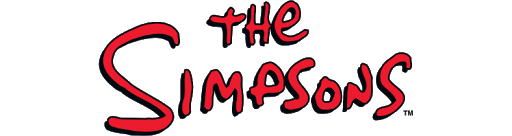

He seleccionado 5 personajes de la serie para dividirlos en categorías, por lo tanto, tendriamos 5 categorías referente a estos personajes.

1. Homer Simpson
2. Marge Simpson
3. Bart Simpson
4. Lisa Simpson
5. Moe Szyslak

Aportando más información del dataset, tenemos 500 imagenes de cada categoría para el entrenamiento de la red neuronal, y 100 de cada categoría para probar la validación. 

Por lo tanto contamos con un total de 2500 imagenes de entrenamiento y 500 de validación.

Antes de empezar a analizar las pruebas y resultados del entrenamiento y validación de la red neuronal, tenemos que observar que si tenemos 5 categorías la probabilidad de aceptar aleatoriamente una categoría correcta sería de un 20%. 

Teniendo este dato en cuenta, cualquier resultado por encima de este 20% ya sería una prueba de que la red neuronal funciona mejor que "aceptar aleatoriamente una categoría".

## **Herramientas**
Para la realización de la práctica, voy a emplear **Keras**, una biblioteca de **Redes Neuronales** de código abierto escrita en Python. Sus características más relevantes se centran en la facilidad de uso, la modularidad y la escalabilidad. Además, Keras nos brinda la capacidad de transferir cálculos a la GPU en lugar de a la CPU, porque la potencia de cómputo paralelo es muy adecuada para las necesidades informáticas de las redes neuronales.

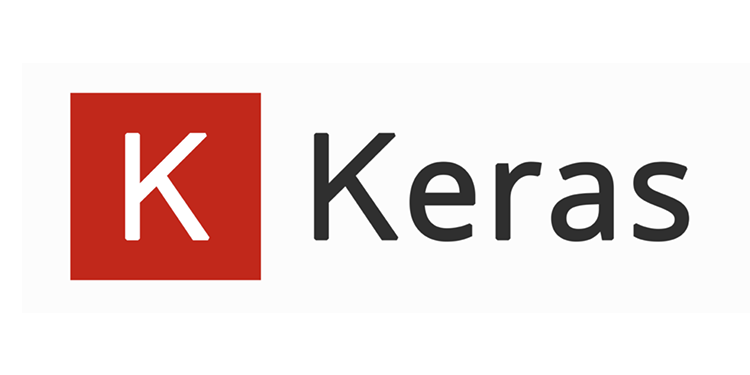


## **1. Red Neuronal con modelo de compilación 1**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Fuente de datos**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import keras

# DATA SOURCE --------------------------------------------------

batch_size = 25 # Lote de imagenes

train_data_dir = '/content/drive/MyDrive/dataset/training'
validation_data_dir = '/content/drive/MyDrive/dataset/validation'


Como sabemos, el data augmentation consiste en aplicar una serie de ligeras modificaciones a las imágenes que forman el dataset con el que vamos a trabajar para aumentar el conjunto de imágenes, como por ejemplo, invertir la imagen ampliarla o incluso rotarla. Como resultado, tendremos más imágenes que ayudarán al clasificador a separar entre los distintos casos que se presenten, que en el nuestro se trata de diferenciar entre los diferentes personajes de la serie.

El data augmentation se lleva a cabo definiendo una serie de parámetros en la inicialización de la clase ImageDataGenerator. En nuestro caso, nuestra inicialización es la siguiente:

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(300 , 300),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical')

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


### **Modelo**

In [ ]:
# MODEL --------------------------------------------------
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



### **Training**

In [ ]:
epochs = 50

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

history = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [es]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 50s 494ms/step - loss: 1.6144 - accuracy: 0.2189 - val_loss: 1.5580 - val_accuracy: 0.3680
Epoch 2/50
100/100 [==============================] - 49s 491ms/step - loss: 1.5834 - accuracy: 0.2582 - val_loss: 1.5216 - val_accuracy: 0.4220
Epoch 3/50
100/100 [==============================] - 49s 490ms/step - loss: 1.5501 - accuracy: 0.3171 - val_loss: 1.4664 - val_accuracy: 0.3860
Epoch 4/50
100/100 [==============================] - 49s 489ms/step - loss: 1.4923 - accuracy: 0.3691 - val_loss: 1.4172 - val_accuracy: 0.5020
Epoch 5/50
100/100 [==============================] - 49s 490ms/step - loss: 1.4664 - accuracy: 0.3999 - val_loss: 1.3753 - val_accuracy: 0.5340
Epoch 6/50
100/100 [==============================] - 49s 488ms/step - loss: 1.4463 - accuracy: 0.4146 - val_loss: 1.3341 - val_accuracy: 0.5220
Epoch 7/50
100/100 [==============================] - 49s 488ms/step - loss: 1.4004 - accuracy: 0.4361 - val_loss: 1.3026 - val_ac

### **Mapas de la precisión y pérdida**

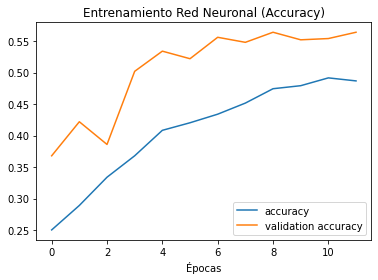

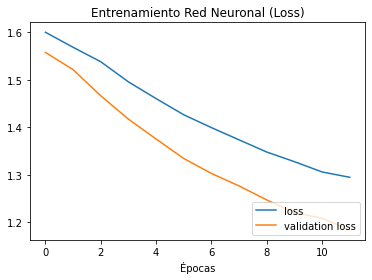

----------Matriz de confusión----------
[[ 9 34 25 20 12]
 [ 7 38 27 25  3]
 [12 29 23 25 11]
 [14 29 27 20 10]
 [11 37 18 20 14]]


In [ ]:
# PLOTTING --------------------------------------------------
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Entrenamiento Red Neuronal (Accuracy)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Entrenamiento Red Neuronal (Loss)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

Y_pred = model.predict(validation_generator, 66 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('----------Matriz de confusión----------')
print(confusion_matrix(validation_generator.classes, y_pred))



### **Guardando el modelo**

In [ ]:
model.save("mimodelo.h5")

## **2. Red neuronal con compilación del modelo 2**


In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150 , 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


### **Modelo**

In [ ]:
# MODEL --------------------------------------------------
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss= 'categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

### **Training**

In [ ]:
epochs = 50

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

history = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [es]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 21s 206ms/step - loss: 1.7765 - accuracy: 0.3450 - val_loss: 1.1117 - val_accuracy: 0.5100
Epoch 2/50
100/100 [==============================] - 20s 203ms/step - loss: 1.0905 - accuracy: 0.5639 - val_loss: 0.9558 - val_accuracy: 0.6500
Epoch 3/50
100/100 [==============================] - 20s 202ms/step - loss: 0.9217 - accuracy: 0.6398 - val_loss: 0.8422 - val_accuracy: 0.6740
Epoch 4/50
100/100 [==============================] - 20s 202ms/step - loss: 0.8496 - accuracy: 0.6602 - val_loss: 0.8164 - val_accuracy: 0.6780
Epoch 5/50
100/100 [==============================] - 20s 203ms/step - loss: 0.7203 - accuracy: 0.7184 - val_loss: 0.7889 - val_accuracy: 0.6920
Epoch 6/50
100/100 [==============================] - 20s 203ms/step - loss: 0.6966 - accuracy: 0.7222 - val_loss: 0.7800 - val_accuracy: 0.7080
Epoch 7/50
100/100 [==============================] - 20s 202ms/step - loss: 0.6450 - accuracy: 0.7524 - val_loss: 0.7411 - val_ac

### **Mapas de la precisión y pérdida**

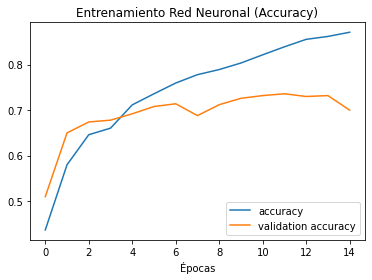

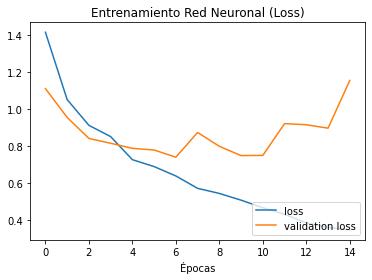

----------Matriz de confusión----------
[[ 6 15 42 19 18]
 [15 19 26 19 21]
 [ 8 23 33 19 17]
 [ 8 19 28 19 26]
 [12 17 23 31 17]]


In [ ]:
# PLOTTING --------------------------------------------------
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 
import numpy as np

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Entrenamiento Red Neuronal (Accuracy)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Entrenamiento Red Neuronal (Loss)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

Y_pred = model.predict(validation_generator, 66 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('----------Matriz de confusión----------')
print(confusion_matrix(validation_generator.classes, y_pred))



### **Guardando el segundo modelo**

In [ ]:
model.save("mimodelo2.h5")

## **3. Transfer Learning**

El transfer learning o aprendizaje por transferencia es una de las tecnologías más importantes para el aprendizaje automático de inteligencia artificial en el aprendizaje profundo. Básicamente, se trata de utilizar mucha información relacionada con la resolución de problemas y aplicarla a diferentes problemas, compartiendo determinadas características entre ellos. En otras palabras, implica modificar el patrón ya entrenado (o red neuronal) para reconocer ciertas características, identificando así características similares. Ahora, utilizando la red neuronal VGG16 y apoyándonos en el aprendizaje por transferencia, intentaremos mejorar los resultados obtenidos por nuestra red neuronal básica. VGG16 es una red neuronal que se entrenó previamente con el conjunto de datos ImageNet, que contiene 1,000 categorías diferentes de 1,4 millones de imágenes. Lo que tenemos que hacer es usar la red, quitar la parte completamente conectada y agregar la parte correspondiente a nuestro caso, para que podamos usar el entrenamiento previo de la red VGG16 para mejorar nuestro conjunto de datos de clasificación de imágenes.



In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
import keras
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# DATA SOURCE --------------------------------------------------

batch_size = 25 # Lote de imagenes

train_data_dir = '/content/drive/MyDrive/dataset/training'
validation_data_dir = '/content/drive/MyDrive/dataset/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        zoom_range=0.1
)

validation_datagen = ImageDataGenerator(
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')


# MODEL --------------------------------------------------

conv_base = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
top_model = Flatten()(conv_base.output)
top_model = Dense(128, activation='relu')(top_model)
top_model = Dropout(0.5)(top_model)
output_layer = Dense(5, activation='softmax')(top_model)
model = Model(inputs=conv_base.inputs, outputs=output_layer)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print("\n------------------------ Modelo ----------------------\n")
model.summary()

Found 2500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.

------------------------ Modelo ----------------------

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)   

### **Training**

In [ ]:
epochs = 50

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

history = model.fit_generator(
        train_generator,
        epochs=epochs,
        validation_data = validation_generator,
        callbacks = [es]
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 30s 264ms/step - loss: 2.0993 - accuracy: 0.1873 - val_loss: 1.6362 - val_accuracy: 0.2300
Epoch 2/50
100/100 [==============================] - 26s 260ms/step - loss: 1.8131 - accuracy: 0.2220 - val_loss: 1.5038 - val_accuracy: 0.3500
Epoch 3/50
100/100 [==============================] - 26s 259ms/step - loss: 1.6665 - accuracy: 0.2472 - val_loss: 1.4001 - val_accuracy: 0.4700
Epoch 4/50
100/100 [==============================] - 26s 260ms/step - loss: 1.5447 - accuracy: 0.3347 - val_loss: 1.2931 - val_accuracy: 0.5660
Epoch 5/50
100/100 [==============================] - 27s 270ms/step - loss: 1.4486 - accuracy: 0.3842 - val_loss: 1.1735 - val_accuracy: 0.6280
Epoch 6/50
100/100 [==============================] - 26s 258ms/step - loss: 1.2930 - accuracy: 0.4644 - val_loss: 1.0425 - val_accuracy: 0.7060
Epoch 7/50
100/100 [==============================] - 26s 258ms/step - loss: 1.1943 - accuracy: 0.5159 - val_loss: 0.9180 - val_ac

### **Mapas de la precisión y pérdida**

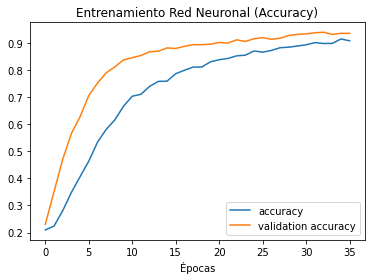

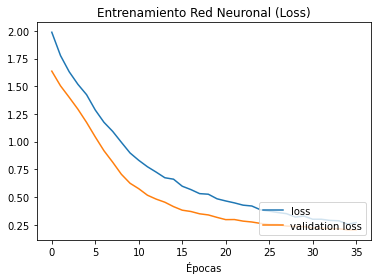

----------Matriz de confusión----------
[[19 19 17 20 25]
 [25 25 16 21 13]
 [22 22 20 21 15]
 [20 15 17 28 20]
 [10 18 30 19 23]]


In [ ]:
# PLOTTING --------------------------------------------------
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
import numpy as np

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

plt.title('Entrenamiento Red Neuronal (Accuracy)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Entrenamiento Red Neuronal (Loss)')
plt.xlabel('Épocas')
plt.legend(loc="lower right")
plt.show()

Y_pred = model.predict(validation_generator, 66 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('----------Matriz de confusión----------')
print(confusion_matrix(validation_generator.classes, y_pred))

### **Guardando el modelo de Transfer learning**

In [ ]:
model.save("mimodeloTL.h5")

## **4. Conclusiones**

### **Diferencia entre modelos**

Como vemos en la primera parte, usamos el optimizador **adaDelta Keras**, lo cual nos garantiza más o menos una **precisión de acierto del 55%**, que teniendo en cuenta las categorias, es una precisión de acierto muy mejorada con respecto a elegir aleatoriamente (20%). Sin embargo, si tratamos esta red neuronal con otro optimizador como es el **adam**, observarmos que obtenemos  mejores resultados hasta llegar hasta un **73% de acierto**. Por lo que en este sentido si creamos una red neuronal desde cero, optariamos por el optimizador de adam.

Por último, si utilizamos transfer learning y aprovechamos la red neuronal VGG16, vemos un rendimiento muy elevado llegando hasta el punto de un **93% de acierto**. Esto se debe a que esta red neuronal VGG16, ha sido entrenada con más de un conjunto de datos de más de 14 millones de imágenes que pertenecen a 1000 clases. 

Por tanto, podremos aprovechar esta red neuronal ya creada y añadirle nuestra capa fully-conected para poder usarla en nuestro proyecto de los personajes de la serie de los Simpsons.

### **Configuración de hiperparámetros**

Sobre los parámetros a destacar, observamos que el **batch_size** se encarga de separar en lote las imagenes para cada época del training, estudiamos que cambiar el valor de este parámetro afecta al tiempo de realización de cada época siendo cuanto menor sea el **batch_size** más tiempo tarda en realizar cada época. Esto se debe a que el **batch_size** selecciona el número de imagenes de entrenamiento y las divide según el número que le hayamos asignado.
El ejemplo sería que si tenemos 2500 y elegimos un batch_size de 25, cada época tendría 100 de entrenamiento.
Examinamos que variar este valor del batch_size no incrementa mucho el valor de precisión del acierto, por lo que nos interesa que sea un valor más o menos alto. En este caso el 25 parecía una buena opción.


Otro apartado interesante es la resolución de las imagenes, el **input_shape**, que tras varias pruebas realizadas con distintas resoluciones (150, 300, 400, 512), no obtuvimos una mejoría en el resultado usando unas resoluciones más altas que en la prueba principal con 150, sin embargo, si notamos un coste en el tiempo, siendo en las resoluciones más altas un coste de tiempo demasiado excesivo llegando casi a las 5 o 6 horas de realización de cada prueba, y sin obtener un mejor resultado.

Por último, hemos hecho pruebas con el **tamaño del kernel**. En las pruebas principales empezabamos con un tamaño del kernel de 3x3, ya que trabajamos con una resolucíon de imagenes muy bajas, por lo que no sería necesario aumentar el tamaño a 5x5 o 7x7, que se utiliza para resoluciones más grandes. De todas maneras, pretendimos cambiar el tamaño para ver si surgia algún cambio, en cambio, los resultados son bastantes similares, por lo que podemos confirmar que el tamaño del kernel no afecta demasiado en los resultados obtenidos.








